# Sphere plots

In [2]:
# Imports
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
import matplotlib.patches as mpatches
from IPython.display import Image
from numpy.linalg import lstsq

Latex Macros
$\newcommand{\AA}{\unicode{xC5}}$

In [3]:
base_dir = "$SCRATCH/droplet/results/finalResults/avg/"
mrad = genfromtxt(base_dir+"monoEdge.txt")[:,:-1]
brad = genfromtxt(base_dir+"bulkEdge.txt")[:,:-1]
mnum = genfromtxt(base_dir+"nMono.txt")[:,:0]
mnum = genfromtxt(base_dir+"nMono.txt")[:,:0]
bheight = genfromtxt(base_dir+"dropletHeight.txt")[:,:-1]
#data[g]['v'][:,1:]=pi*data[g]['h'][:,1:]/6*(3*data[g]['br'][:,1:]**2+data[g]['h'][:,1:]**2)
bvol=pi*bheight/6*(3*brad**2+bheight**2)

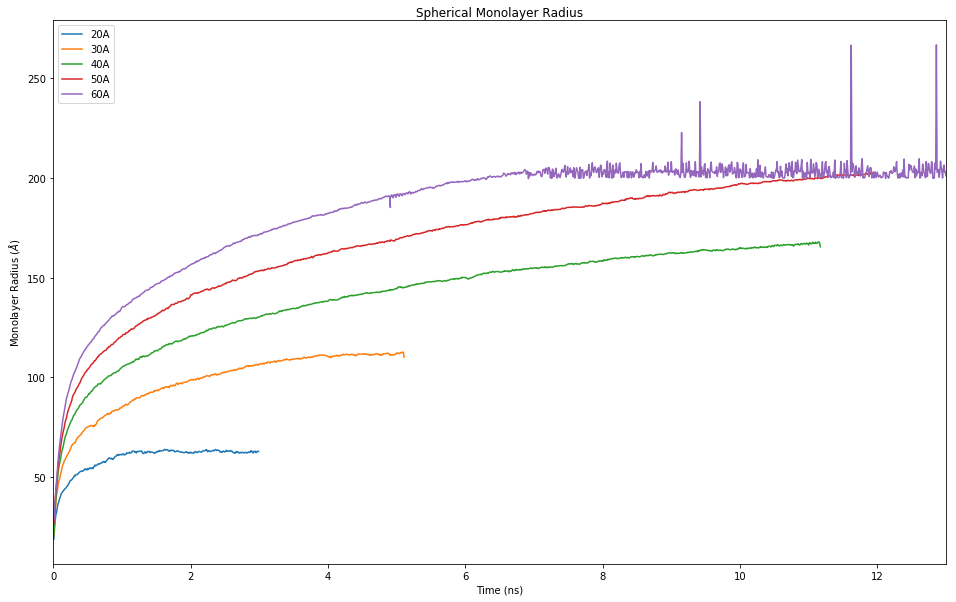

In [4]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    plot(tt,mr,label=lbl)
title('Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(150,200) 
xlim(0,13)
legend(loc='best')
savefig('results/mr_latest.png')

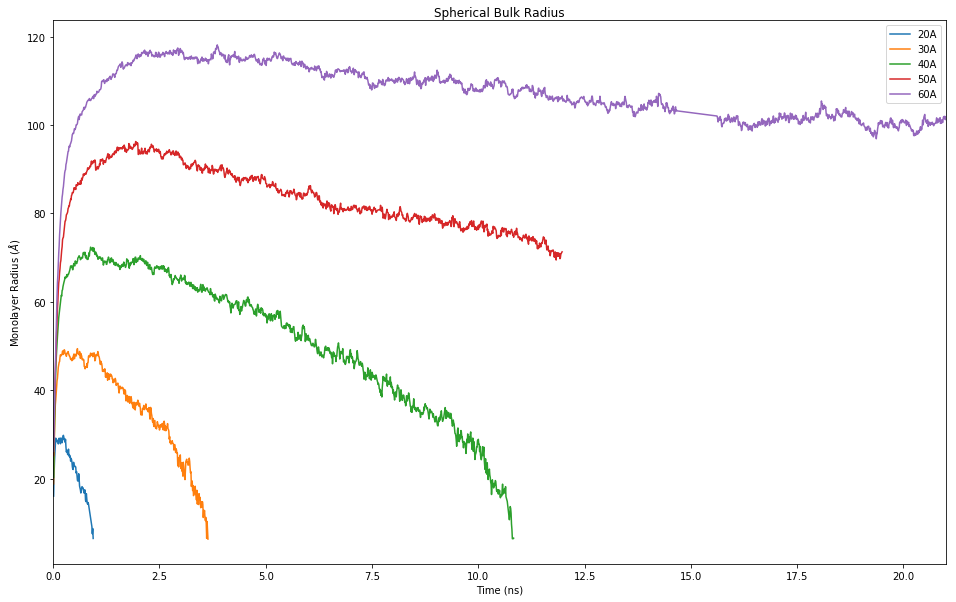

In [5]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and(t_all > 0,brad[:,i]>0)
    tt = t_all[whichvals]
    mr = brad[:,i][whichvals]
    plot(tt,mr,label=lbl)
title('Spherical Bulk Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(150,200) 
xlim(0,21)
legend(loc='best')
savefig('results/br_latest.png')

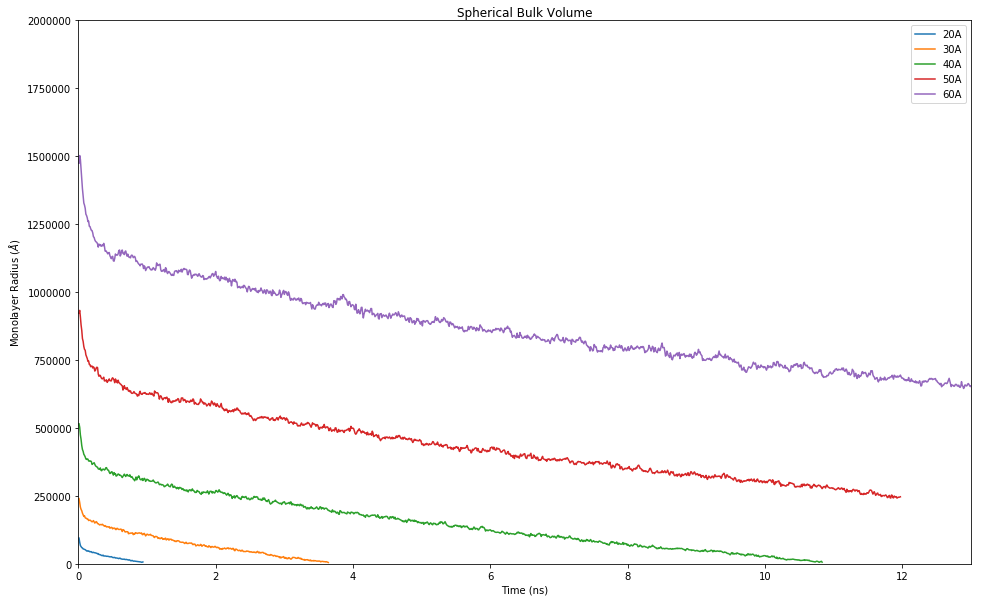

In [6]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and(t_all > 0,bvol[:,i]<1e7)
    tt = t_all[whichvals]
    bv = bvol[:,i][whichvals]
    plot(tt,bv,label=lbl)
title('Spherical Bulk Volume')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
ylim(0,2e6) 
xlim(0,13)
legend(loc='best')
savefig('results/br_latest.png')

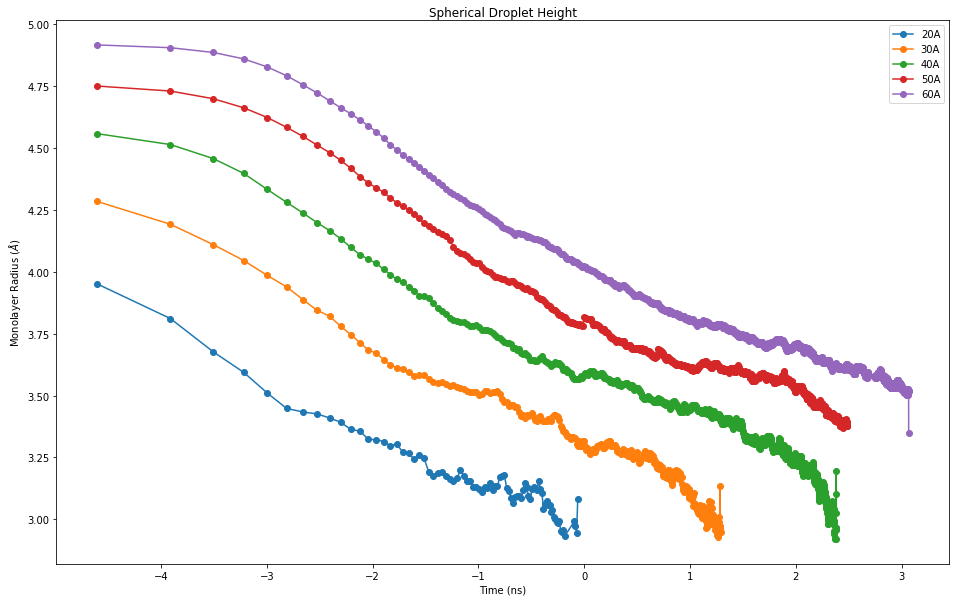

In [7]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all > 0,brad[:,i]>0,bvol[:,i]<1e7])
    tt = t_all[whichvals]
    bh = bheight[:,i][whichvals]
    bv = bvol[:,i][whichvals]
    br = brad[:,i][whichvals]
    mr = mrad[:,i][whichvals]
    plot(log(tt),log(bh),'o-',label=lbl)
title('Spherical Droplet Height')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(0,150) 
#xlim(0,13)
#xlim(0,1e7)
legend(loc='best')
savefig('results/br_latest.png')

In [8]:
# Time for all droplet fitting to begin (ns)
starttime = exp(-1)

# Times at which droplets have ceased spreading (ns)
#endtimes = [1.5,4,12,12,12]
endtimes = [12,12,12,12,7]

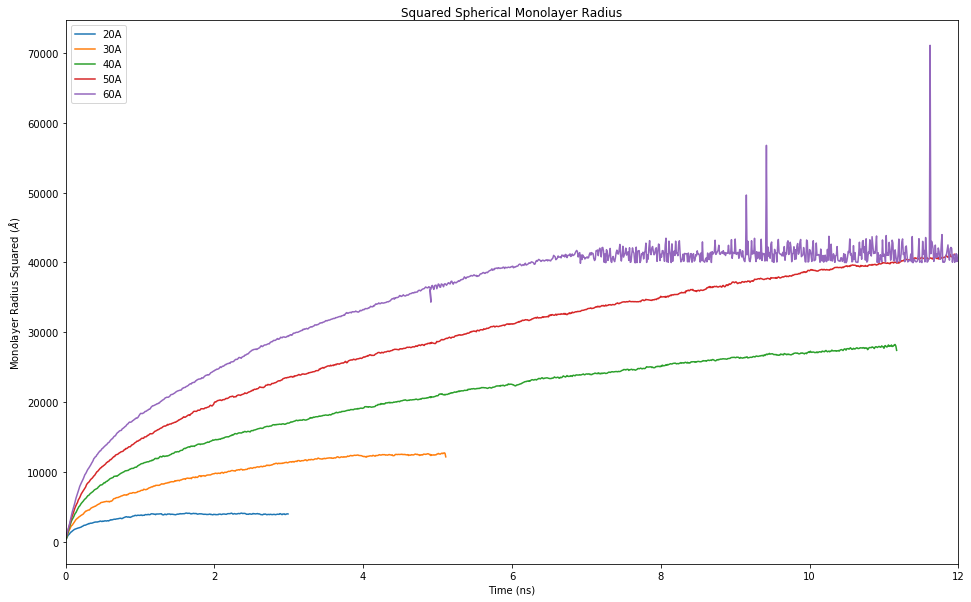

In [9]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    plot(tt,mr**2,label=lbl)
title('Squared Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius Squared ($\AA$)')
#ylim(0,400) 
xlim(0,12)
legend(loc='best')

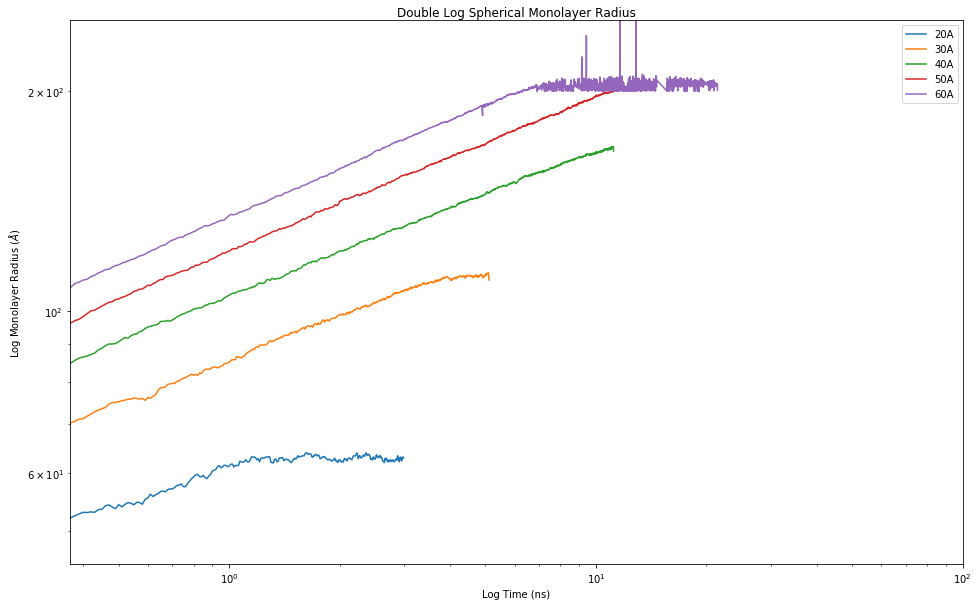

In [10]:
# Create figure
figure(figsize=[16,10])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = t_all > 0
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    #plot(log(tt),log(mr),
    #    label=lbl)
    loglog(tt,mr,label=lbl)
title('Double Log Spherical Monolayer Radius')
xlabel('Log Time (ns)')
ylabel(r'Log Monolayer Radius ($\AA$)')
#ylim(0,400) 
#xlim(starttime,log(100))
#ylim(4,5.25)
xlim(starttime,100)
ylim(45,250)
legend(loc='best')
savefig('results/logmr_30A_6ns.png')

In [11]:
# Linear least squares
def lin_ls(xx,yy):
    # Set up system
    A = array([[sum(xx**2),sum(xx)],[sum(xx),len(xx)]])
    b = array([sum(xx*yy),sum(yy)])
    
    # Solve system using numpy.linalg.lstsq
    mm,bb = lstsq(A,b)[0]
    
    return mm,bb

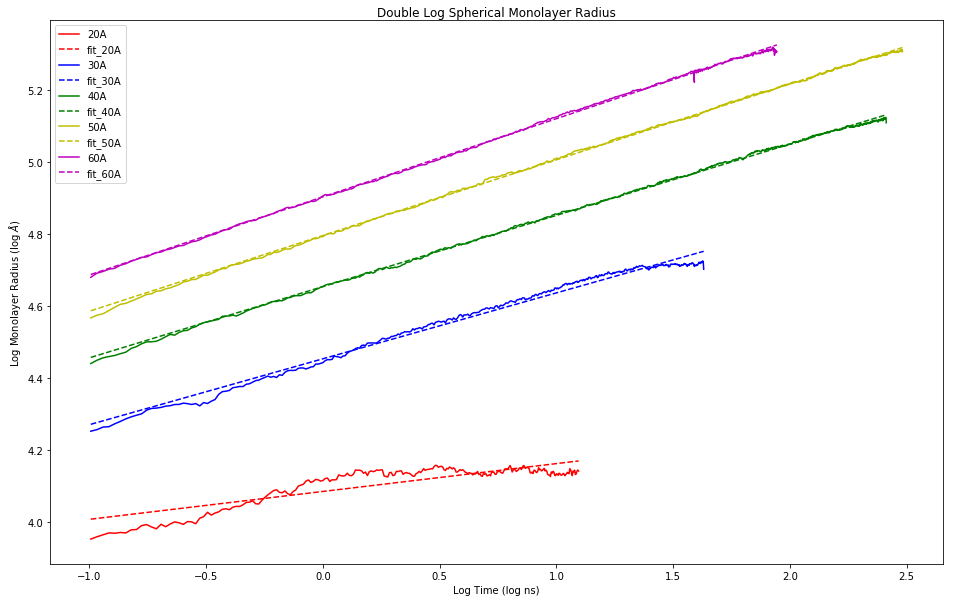

In [12]:
# Least squares fit of above plot - double log plot of monolayer radius
def line_func(x,m,b):
    return m*x + b

# Create figure
figure(figsize=[16,10])

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all<endtimes[i-1],t_all > starttime,isfinite(mrad[:,i])])
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    
    # least sqares
    mm,bb = lin_ls(log(tt),log(mr))
    
    # Plot data
    plot(log(tt),log(mr),
        label=lbl,color=colors[i-1])
    
    # Plot fit
    plot(log(tt),mm*log(tt)+bb,'--',label='fit_{}'.format(lbl),color=colors[i-1])
title('Double Log Spherical Monolayer Radius')
xlabel('Log Time (log ns)')
ylabel(r'Log Monolayer Radius (log $\AA$)')
#ylim(0,400) 
#xlim(0,10)
legend(loc='best')

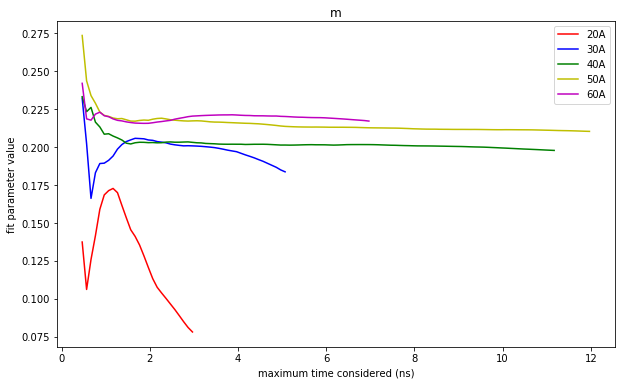

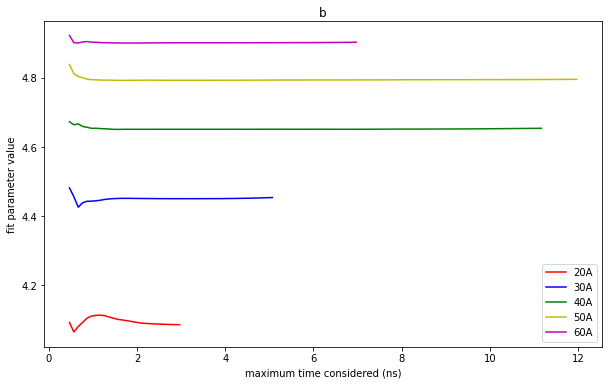

In [13]:
# Plot coefficients (b,m) as functions of the maximum time considered.
# i.e., b(t1) = lstsq(t \in [t0,t1])

# Create figure
fig1 = figure(figsize=[10,6])
ax1 = gca()
fig2 = figure(figsize=[10,6])
ax2 = gca()

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    # Final times to consider
    trange = arange(starttime,endtimes[i-1],1e-1)[1:]
    
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    m_list = zeros_like(trange)
    b_list = zeros_like(trange)
    m_list[:] = nan
    b_list[:] = nan
    for k, tmax in enumerate(trange):
        
        # Only consider after which there is still data
        if(mrad[:,i][logical_and(t_all>=tmax,isfinite(mrad[:,i]))].size > 0):
            whichvals = logical_and.reduce([t_all<tmax,t_all > starttime,isfinite(mrad[:,i])])
            tt = t_all[whichvals]
            mr = mrad[:,i][whichvals]

            # least sqares
            m_list[k],b_list[k] = lin_ls(log(tt),log(mr))
        else:
            break

    
    # Plot m values
    ax1.plot(trange,m_list,'-',label='{}'.format(lbl),color=colors[i-1])
    # Plot b values
    ax2.plot(trange,b_list,'-',label='{}'.format(lbl),color=colors[i-1])
#title('Double Log Spherical Monolayer Radius')
#xlabel('Log Time (log ns)')
#ylabel(r'Log Monolayer Radius (log $\AA$)')
#ylim(0,400) 
#xlim(0,10)
ax1.set_title('m')
ax2.set_title('b')
ax1.set_xlabel('maximum time considered (ns)')
ax2.set_xlabel('maximum time considered (ns)')
ax1.set_ylabel('fit parameter value')
ax2.set_ylabel('fit parameter value')
fig1.savefig('results/m_plot.png')
ax1.legend(loc='best')
ax2.legend(loc='best')
fig2.savefig('results/b_plot.png')

In [14]:
ls

comparison.ipynb                   flowfield.py
Cylinder.ipynb                     Interpolation.ipynb
Cylindrical Monolayer Model.ipynb  movie_50A_vfield.o342203
Data Test.ipynb                    results/
Droplet Model.ipynb                Spherical Monolayer Model.ipynb


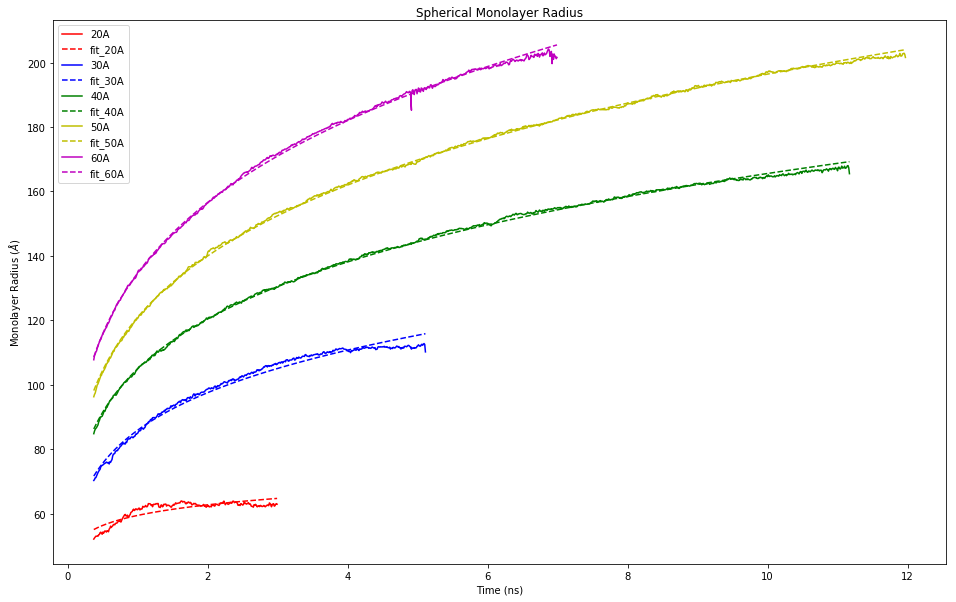

In [15]:
# Create figure
figure(figsize=[16,10])

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

# Matrix of least squares coefficients
ls_coefs = zeros([5,2])

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all<endtimes[i-1],t_all > starttime,isfinite(mrad[:,i])])
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    
    # least sqares
    mm,bb = lin_ls(log(tt),log(mr))
    
    # Save coefficients
    ls_coefs[i-1,:] = mm,bb
    
    # Plot data
    plot(tt,mr,
        label=lbl,color=colors[i-1])
    
    # Plot fit
    plot(tt,exp(bb)*tt**mm,'--',label='fit_{}'.format(lbl),color=colors[i-1])
title('Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(0,400) 
#xlim(0,10)
legend(loc='best')

In [16]:
# Base radii
R = linspace(20,60,5)

In [17]:
# Scaling coefficients (Ignore 20A)
start = 1
sc_m_m,sc_m_b = lin_ls(log(R[start:]),log(ls_coefs[start:,0]))
sc_b_m,sc_b_b = lin_ls(log(R[start:]),log(ls_coefs[start:,1]))

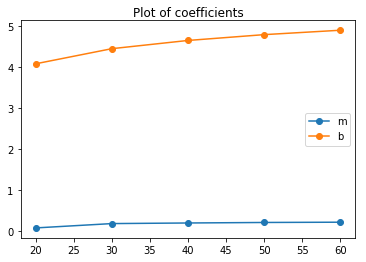

In [18]:
plot(R,ls_coefs[:,0],'o-',label='m')
plot(R,ls_coefs[:,1],'o-',label='b')
title('Plot of coefficients')
legend()

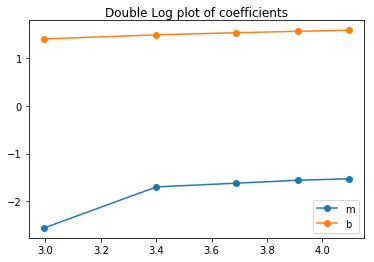

In [19]:
plot(log(R),log(ls_coefs[:,0]),'o-',label='m')
plot(log(R),log(ls_coefs[:,1]),'o-',label='b')
title('Double Log plot of coefficients')
legend()

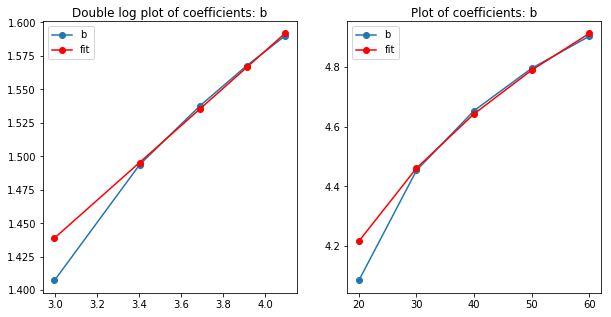

In [20]:
figure(figsize=[10,5])

subplot(1,2,1)
plot(log(R),log(ls_coefs[:,1]),'o-',label='b')
plot(log(R),sc_b_m*log(R)+sc_b_b,'or-',label='fit')
title('Double log plot of coefficients: b')
legend()

subplot(1,2,2)
plot(R,ls_coefs[:,1],'o-',label='b')
plot(R,exp(sc_b_b)*R**sc_b_m,'or-',label='fit')
title('Plot of coefficients: b')
legend()

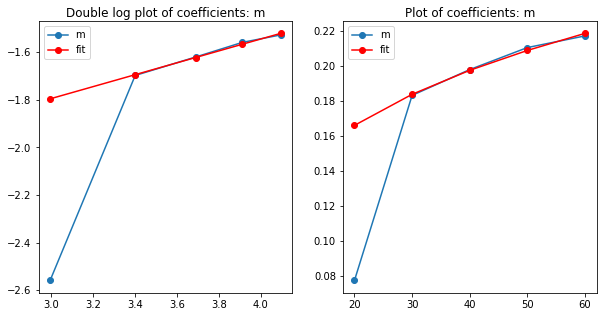

In [21]:
figure(figsize=[10,5])

subplot(1,2,1)
plot(log(R),log(ls_coefs[:,0]),'o-',label='m')
plot(log(R),sc_m_m*log(R)+sc_m_b,'or-',label='fit')
title('Double log plot of coefficients: m')
legend()

subplot(1,2,2)
plot(R,ls_coefs[:,0],'o-',label='m')
plot(R,exp(sc_m_b)*R**sc_m_m,'or-',label='fit')
title('Plot of coefficients: m')
legend()

In [22]:
ls_coefs

array([[ 0.07736524,  4.08503011],
       [ 0.18304918,  4.45356768],
       [ 0.19778901,  4.65406311],
       [ 0.21035765,  4.79600922],
       [ 0.21701593,  4.90346242]])

20A: r_m = 67.78638081478057 t ^ 0.16592197466278719
30A: r_m = 86.58359169585091 t ^ 0.18365360918062598
40A: r_m = 103.88982585941659 t ^ 0.19737210148012385
50A: r_m = 120.27520900478476 t ^ 0.2087148273637373
60A: r_m = 136.02850984896676 t ^ 0.21846472633934488


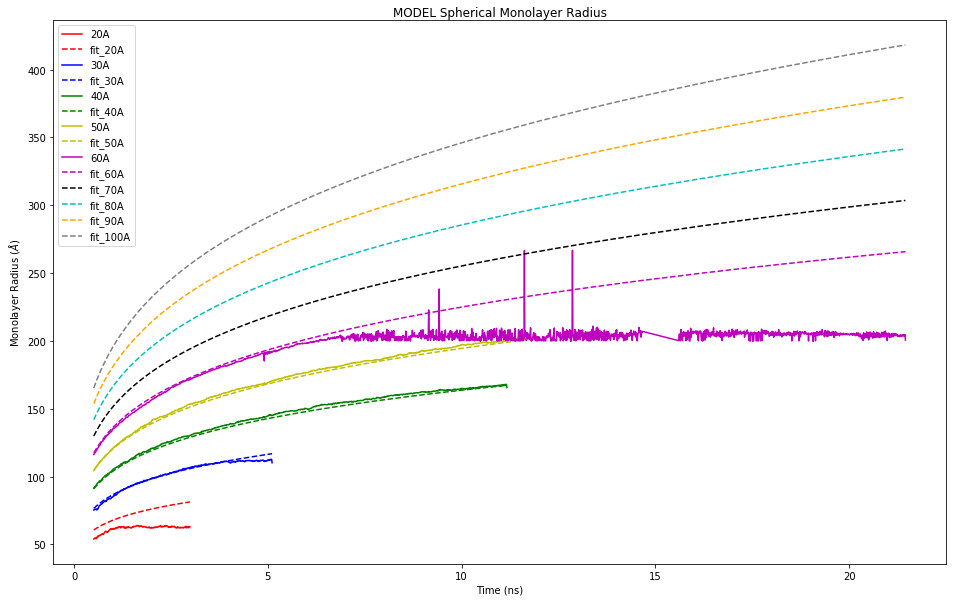

In [23]:
# Test model

# Create figure
figure(figsize=[16,10])

colors = ['r','b','g','y','m','k','c','orange','grey']

# Plot monolayer radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and(t_all > 5e-1,isfinite(mrad[:,i]))
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    
    # Scaling coefficients (non-log)
    #mm = sc_m_m*R[i-1] + sc_m_b
    #bb = sc_b_m*R[i-1] + sc_b_b
    
    # Scaling coefficients (log)
    mm = exp(sc_m_b)*R[i-1]**sc_m_m
    bb = exp(sc_b_b)*R[i-1]**sc_b_m
    
    # Model
    yy = exp(bb)*tt**mm
    print('{}0A: r_m = {} t ^ {}'.format(i+1,exp(bb),mm))
    
    # Plot data
    plot(tt,mr,
        label=lbl,color=colors[i-1])
    
    # Plot model
    plot(tt,yy,'--',label='fit_{}'.format(lbl),color=colors[i-1])
    
# Include 70A - 100A model
for i in range(6,10):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    tt = t_all[t_all > 5e-1]
    
    # Scaling coefficients (non-log)
    #mm = sc_m_m*R[i-1] + sc_m_b
    #bb = sc_b_m*R[i-1] + sc_b_b
    
    # Base radius
    RR = 10*(i+1)
    # Scaling coefficients (log)
    mm = exp(sc_m_b)*RR**sc_m_m
    bb = exp(sc_b_b)*RR**sc_b_m
    
    # Model
    yy = exp(bb)*tt**mm
    
    # Plot model
    plot(tt,yy,'--',label='fit_{}A'.format(RR),color=colors[i-1])

title('MODEL Spherical Monolayer Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(0,400) 
#xlim(0,10)
legend(loc='best')

## Running averaging & contact angle / speed plots

In [24]:
# Thanks to Jamie http://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## Least Squares for Linear Bulk Volume

In [25]:
bvol[:,0]/1e6

array([  0.00000000e+00,   2.09439510e+06,   1.67551608e+07, ...,
         2.06122370e+16,   2.06411056e+16,   2.06700013e+16])

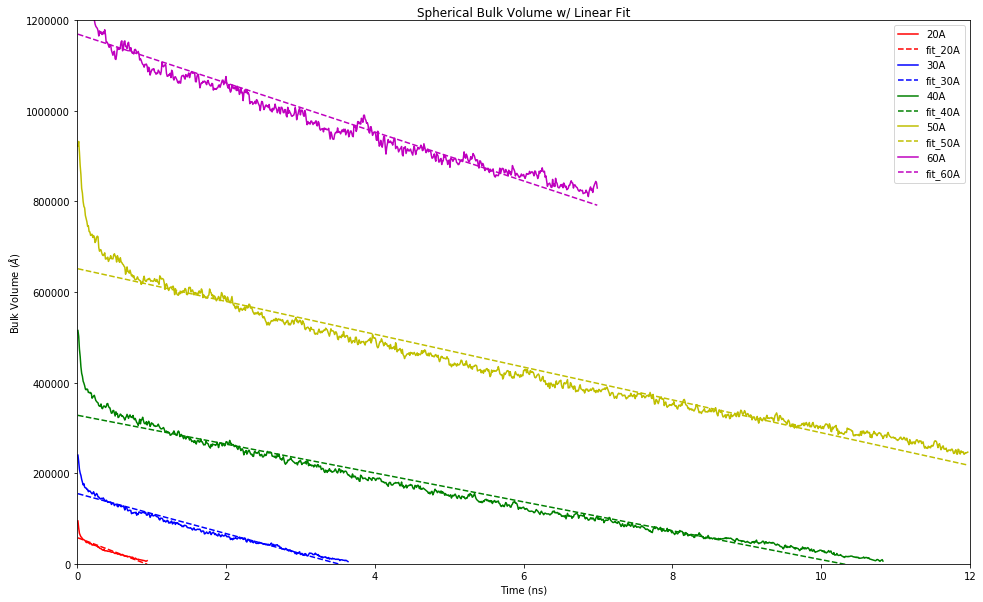

In [26]:
# Least squares fit of above plot - double log plot of monolayer radius
def line_func(x,m,b):
    return m*x + b

# Create figure
figure(figsize=[16,10])

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

bulk_ls_coef = zeros([bvol.shape[1]-1,2])

# Plot bulk volume
for i in range(1,bvol.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all<endtimes[i-1],t_all > 0*starttime,isfinite(bvol[:,i]),bvol[:,i]<1e7])
    tt = t_all[whichvals]
    bv = bvol[whichvals,i]
    
    # least sqares
    mm,bb = lin_ls(tt,bv)
    
    # Save to array
    bulk_ls_coef[i-1,:] = mm,bb
    
    # Plot data
    plot(tt,bv,
        label=lbl,color=colors[i-1])
    
    # Plot fit
    plot(tt,mm*tt+bb,'--',label='fit_{}'.format(lbl),color=colors[i-1])
title('Spherical Bulk Volume w/ Linear Fit')
xlabel('Time (ns)')
ylabel(r'Bulk Volume ($\AA$)')
ylim(0,1.2e6) 
xlim(0,12)
legend(loc='best')

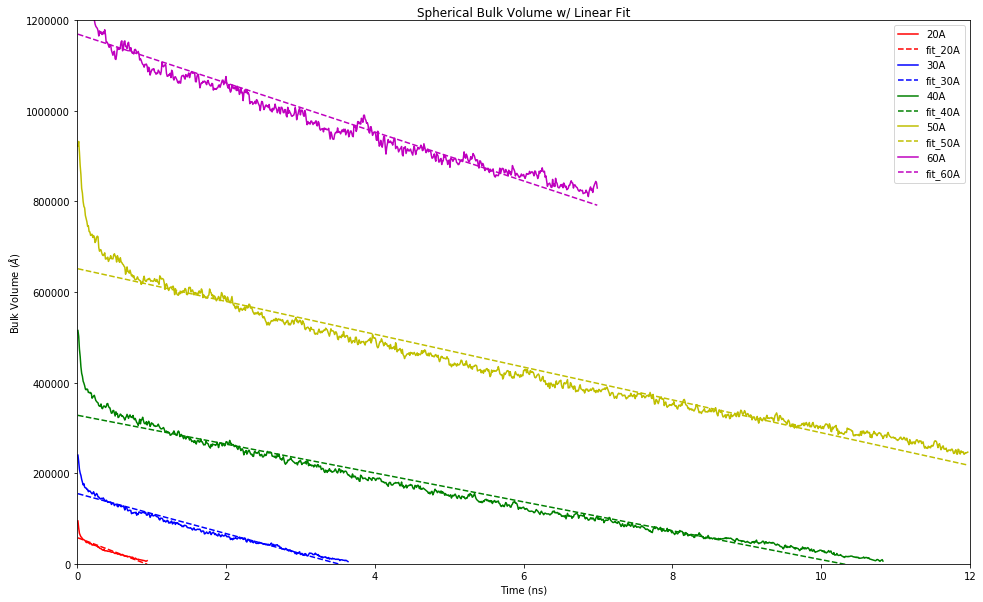

In [27]:
# Least squares fit of above plot - double log plot of monolayer radius
def line_func(x,m,b):
    return m*x + b

# Create figure
figure(figsize=[16,10])

# Initial guess
guess = [0,0]

colors = ['r','b','g','y','m']

bulk_ls_coef = zeros([bvol.shape[1]-1,2])

# Plot bulk volume
for i in range(1,bvol.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all<endtimes[i-1],t_all > 0*starttime,isfinite(bvol[:,i]),bvol[:,i]<1e7])
    tt = t_all[whichvals]
    bv = bvol[whichvals,i]
    
    # least sqares
    mm,bb = lin_ls(tt,bv)
    
    # Save to array
    bulk_ls_coef[i-1,:] = mm,bb
    
    # Plot data
    plot(tt,bv,
        label=lbl,color=colors[i-1])
    
    # Plot fit
    plot(tt,mm*tt+bb,'--',label='fit_{}'.format(lbl),color=colors[i-1])
title('Spherical Bulk Volume w/ Linear Fit')
xlabel('Time (ns)')
ylabel(r'Bulk Volume ($\AA$)')
ylim(0,1.2e6) 
xlim(0,12)
legend(loc='best')

## Bulk Radius Model
Assuming:
- conservation of volume
- constant volume flow from bulk to monolayer
- monolayer radius grows like $r_b(t) = at^b$

From Desmos: 

$r_b\left(t\right)=\sqrt{2a^2\left(t^{2b}-t_0^{2b}\right)-\frac{k\left(t-t_0\right)}{\pi h_m}+r_0^2}$

In [28]:
# def bulk_model(t,t0,a,b,k,hm,r0):
#     # print('t0 = {}'.format(t0))
#     # print('a = {}'.format(a))
#     # print('b = {}'.format(b))
#     # print('hm = {}'.format(hm))
#     # print('r0 = {}'.format(r0))
#     # print()
#     return sqrt(2*a**2 * (t**(2*b) - t0**(2*b)) - k*(t-t0)/(pi*hm) + r0**2)

## Bulk Radius Model #2

Assuming same as above w/ IC $r_b(0) = r_m(0) = 0$

From "Droplet Bulk Model" on 3/27/2017

$r_b(t) = \sqrt{\alpha^2 t^{2\beta} - \frac{kt}{\pi h_m}}$

In [29]:
def bulk_model(t,a,b,k,hm):
    return sqrt(a**2 * t**(2*b) - k*t/(pi*hm))

20A:
30A:
40A:
50A:
60A:


/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


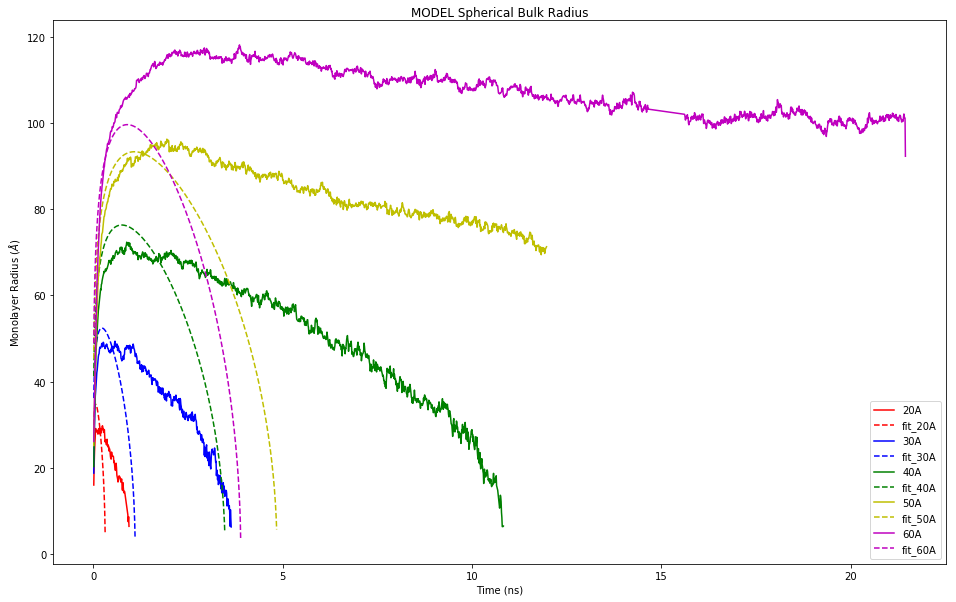

In [37]:
# Test model

# Create figure
figure(figsize=[16,10])

colors = ['r','b','g','y','m','k','c','orange','grey']

starttime = 0.60653065971263342

#hm = 2
hm = 2

# Plot bulk radius
for i in range(1,mrad.shape[1]):
    lbl = '{}0A'.format(i+1)
    t_all = mrad[:,0]/1e6
    whichvals = logical_and.reduce([t_all > 0*starttime,isfinite(mrad[:,i]),brad[:,i]>0])
    tt = t_all[whichvals]
    mr = mrad[:,i][whichvals]
    br = brad[:,i][whichvals]
    
    # Scaling coefficients for monolayer (log)
    mm = exp(sc_m_b)*R[i-1]**sc_m_m
    bb = exp(sc_b_b)*R[i-1]**sc_b_m
    
    # Plot bulk radiusdata
    plot(tt,br,
        label=lbl,color=colors[i-1])
    
    # Print parameters
    print('{}0A:'.format(i+1))
    # Plot model bulk radius
    yy =  bulk_model(tt,exp(bb),mm,-bulk_ls_coef[i-1,0],hm)
    plot(tt,yy,'--',label='fit_{}'.format(lbl),color=colors[i-1])
    
# # Include 70A - 100A model
# for i in range(6,10):
#     lbl = '{}0A'.format(i+1)
#     t_all = mrad[:,0]/1e6
#     tt = t_all[t_all > 5e-1]
#     
#     # Scaling coefficients (non-log)
#     #mm = sc_m_m*R[i-1] + sc_m_b
#     #bb = sc_b_m*R[i-1] + sc_b_b
#     
#     # Base radius
#     RR = 10*(i+1)
#     # Scaling coefficients (log)
#     mm = exp(sc_m_b)*RR**sc_m_m
#     bb = exp(sc_b_b)*RR**sc_b_m
#     
#     # Model
#     yy = exp(bb)*tt**mm
#     
#     # Plot model
#     plot(tt,yy,'--',label='fit_{}A'.format(RR),color=colors[i-1])

title('MODEL Spherical Bulk Radius')
xlabel('Time (ns)')
ylabel(r'Monolayer Radius ($\AA$)')
#ylim(0,400) 
#xlim(0,10)
legend(loc='best')

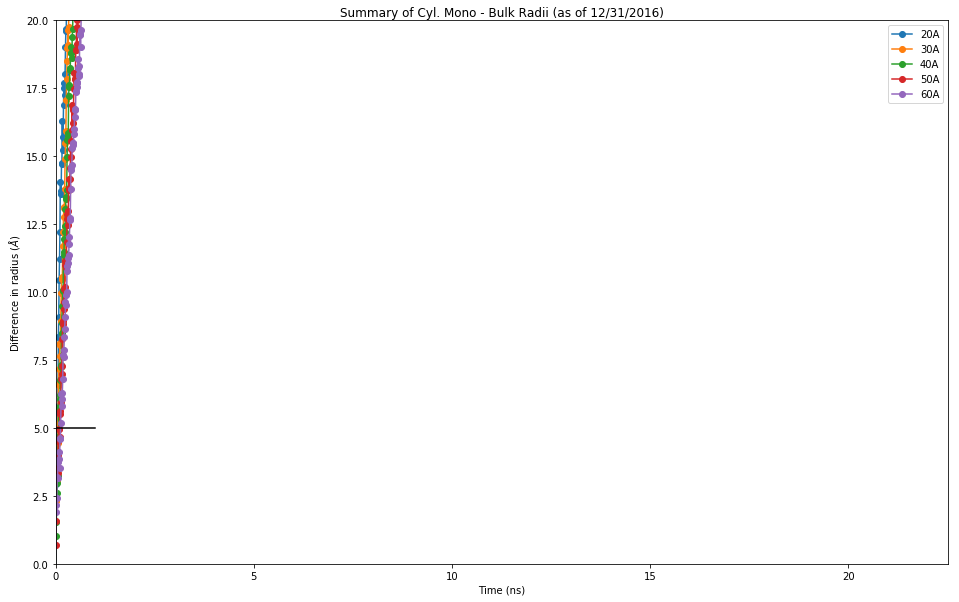

In [31]:
## Monolayer - Bulk Radius difference ##

# Create figure
figure(figsize=[16,10])

# Plot old Sub951By50 values
for i in range(1,brad.shape[1]):
    whichvals = logical_and(brad[:,i]<300,brad[:,i]>10)
    lbl = '{}0A'.format(i+1)
    plot(brad[:,0][whichvals]/1e6,mrad[:,i][whichvals]-brad[:,i][whichvals],'o-',
        label=lbl)

# Disclaimer
disclaimer = '''\
***************************
* Some extraneous values  *
* have been intentionally *
* removed from Old sims   *
***************************'''
#text(.2,60,disclaimer,ha='left',va='top',
    #family='monospace')

# Plot features
title('Summary of Cyl. Mono - Bulk Radii (as of 12/31/2016)')
xlabel('Time (ns)')
ylabel(r'Difference in radius ($\AA$)')
plot([0,1],[5,5],'k-')
ylim(0,20) 
xlim(0,)
legend(loc='best')
savefig('results/sph_diff.png')

In [32]:
# # Plot bulk and monolayer radius together for Sub951By50 Cyl50A
# 
# figure(figsize=[16,10])
# 
# # Cyl50A
# i = 5
# 
# # bulk
# #b_whichvals = logical_and(old_brad[:,i]<300,old_brad[:,i]>10)
# b_lbl = 'Sub951By50 Cyl{}0A Bulk'.format(i)
# plot(old_brad[:,0][whichvals]/1e6,old_brad[:,i][whichvals],
#     label=b_lbl)
# 
# # mono
# #m_whichvals = logical_and(old_mrad[:,i]<300,old_mrad[:,i]>10)
# m_lml = 'Sub951By50 Cyl{}0A Mono'.format(i)
# plot(old_mrad[:,0][whichvals]/1e6,old_mrad[:,i][whichvals],
#     label=m_lml)
# 
# legend()
# ylim(0,250)
# xlim(0,10)